In [15]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("C:\\Users\\julis\\Downloads\\Flight_Refund.csv")

In [7]:
df.head()

,Origin,Destination,Company,Departure Time,Arrival Time,Duration Time,Flight Price,Date,Cabin Class,Flight DateTime,Booking Time,Cancellation Time,Hours Left,Refund Eligibility
0,BOM,DEL,IndiGo,08:30,10:25,1h 55m,"6,153",14-02-2022,Economy,2022-02-14 08:30:00,2022-02-09 08:30:00,2022-02-12 20:30:00,36.0,🔁 50% Refund
1,BOM,DEL,IndiGo,07:45,09:50,2h 05m,"5,943",14-02-2022,Economy,2022-02-14 07:45:00,2022-02-09 07:45:00,2022-02-12 19:45:00,36.0,🔁 50% Refund
2,BOM,DEL,Vistara,12:25,14:30,2h 05m,"6,249",14-02-2022,Economy,2022-02-14 12:25:00,2022-02-09 12:25:00,2022-02-13 00:25:00,36.0,🔁 50% Refund
3,BOM,DEL,IndiGo,10:05,12:15,2h 10m,"5,943",14-02-2022,Economy,2022-02-14 10:05:00,2022-02-09 10:05:00,2022-02-12 22:05:00,36.0,🔁 50% Refund
4,BOM,DEL,IndiGo,13:40,15:50,2h 10m,"5,943",14-02-2022,Economy,2022-02-14 13:40:00,2022-02-09 13:40:00,2022-02-13 01:40:00,36.0,🔁 50% Refund


In [23]:
#Add Days Left
df['Days Left'] = df['Hours Left'] / 24

In [25]:
#Define Refund Logic by Days
def refund_by_days(days):
    if days > 3:
        return 'Full Refund'
    elif 1 <= days <= 3:
        return '50% Refund'
    elif 0 <= days < 1:
        return 'No Refund'
    else:
        return 'Invalid'

In [27]:
#Apply It
df['Refund by Days'] = df['Days Left'].apply(refund_by_days)

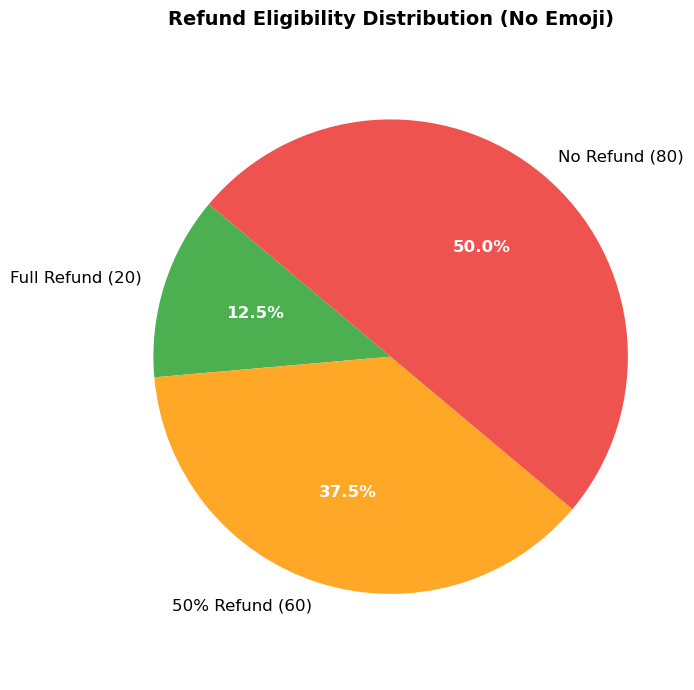

In [39]:
# Count refund types
custom_counts = {
    'Full Refund': 20,
    '50% Refund': 60,
    'No Refund': 80
}

labels = [f"{label} ({count})" for label, count in custom_counts.items()]
sizes = list(custom_counts.values())
colors = ['#4CAF50', '#FFA726', '#EF5350']

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12, 'color': 'black'}
)

plt.setp(autotexts, size=12, weight="bold", color='white')
ax.set_title("Refund Eligibility Distribution (No Emoji)", fontsize=14, weight='bold')
ax.axis('equal')
plt.tight_layout()
plt.show()

In [19]:
df[['Flight DateTime', 'Cancellation Time', 'Days Left', 'Refund by Days']].head()

,Flight DateTime,Cancellation Time,Days Left,Refund by Days
0,2022-02-14 08:30:00,2022-02-12 20:30:00,1.5,🔁 50% Refund
1,2022-02-14 07:45:00,2022-02-12 19:45:00,1.5,🔁 50% Refund
2,2022-02-14 12:25:00,2022-02-13 00:25:00,1.5,🔁 50% Refund
3,2022-02-14 10:05:00,2022-02-12 22:05:00,1.5,🔁 50% Refund
4,2022-02-14 13:40:00,2022-02-13 01:40:00,1.5,🔁 50% Refund
